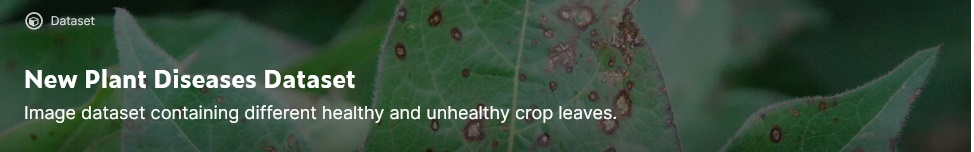

This Notebook is a Data Vizualiation exploration notebook. 

The aim is to explore the dataset more in detail and provide some key information using Visualiation tools.

In [2]:

# Import required packages
import os
import pandas as pd
import seaborn as sns
import numpy as np
from PIL import Image
import io
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline

# Import Bokeh for visualization
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool, ColumnDataSource, FactorRange

# Précision de l'affichage des graphiques dans des cellules jupyter
output_notebook()

In [1]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#@title
# Get Path to Train and Valid folders
train_path = 'drive/MyDrive/20 - Data/DataSet/train'
valid_path = 'drive/MyDrive/20 - Data/DataSet/valid'

# Get list of all subfolders for each Subset
train_dir = os.listdir(train_path)
valid_dir = os.listdir(valid_path)

**Creation of Pandas DataFrame which summarize images data**

In [ ]:
#Option 1 : Creation of data frames which explain for each image :Plant','Category','Disease','Path','Plant___Category'

def Create_DF_DataSet_Info(path):
    
    df=pd.DataFrame(columns=['Plant','Category','Disease','Path','Plant___Category']) 
    for path, dirs, files in os.walk(path,topdown=False):
      for name in files:
       
        plant___category = category=path.split('/')[-1]
        plant = plant___category.split('___')[0]
        category = plant___category.split('___')[-1]
        disease = 0 if category=='healthy' else 1
        full_path = path+'/'+name
       
        new_line=pd.DataFrame([[plant,category,disease,full_path,plant___category]],columns=['Plant','Category','Disease','Path','Plant___Category'])
        df = df.append(new_line,ignore_index=True) 
    return df

train_info = Create_DF_DataSet_Info('/content/drive/MyDrive/20 - Data/DataSet/train')
train_info.to_csv('/content/drive/MyDrive/20 - Data/DataSet/train_info.csv')
valid_info = Create_DF_DataSet_Info('/content/drive/MyDrive/20 - Data/DataSet/valid')
valid_info.to_csv('/content/drive/MyDrive/20 - Data/DataSet/valid_info.csv') 

In [ ]:
# Option 2 : Load CSV already created
train_info=pd.read_csv('/content/drive/MyDrive/20 - Data/DataSet/train_info.csv')
valid_info=pd.read_csv('/content/drive/MyDrive/20 - Data/DataSet/valid_info.csv')


In [ ]:
train_info.head()

,Unnamed: 0,Plant,Category,Disease,Path,Plant___Category
0,0,Apple,Apple_scab,1,/content/drive/MyDrive/20 - Data/DataSet/train...,Apple___Apple_scab
1,1,Apple,Apple_scab,1,/content/drive/MyDrive/20 - Data/DataSet/train...,Apple___Apple_scab
2,2,Apple,Apple_scab,1,/content/drive/MyDrive/20 - Data/DataSet/train...,Apple___Apple_scab
3,3,Apple,Apple_scab,1,/content/drive/MyDrive/20 - Data/DataSet/train...,Apple___Apple_scab
4,4,Apple,Apple_scab,1,/content/drive/MyDrive/20 - Data/DataSet/train...,Apple___Apple_scab


**Creation of Pandas DataFrame which summarize the number of images per class**

In [ ]:
#DataFrame creation for plotting images number
train_count=pd.DataFrame(train_info.groupby(['Plant','Category','Plant___Category']).size())
train_count.rename(columns={0: 'nb'}, inplace=True)
train_count=train_count.reset_index()

valid_count=pd.DataFrame(valid_info.groupby(['Plant','Category']).size())
valid_count.rename(columns={0: 'nb'}, inplace=True)
valid_count=valid_count.reset_index()

train_count.head()

,Plant,Category,Plant___Category,nb
0,Apple,Apple_scab,Apple___Apple_scab,2016
1,Apple,Black_rot,Apple___Black_rot,1987
2,Apple,Cedar_apple_rust,Apple___Cedar_apple_rust,1760
3,Apple,healthy,Apple___healthy,2008
4,Blueberry,healthy,Blueberry___healthy,1816


In [ ]:
print(f"Number of plants (Train): {len(train_count['Plant'].unique())}")
print(f"Number of plants (Valid): {len(valid_count['Plant'].unique())}")

Number of plants (Train): 14
Number of plants (Valid): 14


# Plant Diseases Dataset - Data Visualisation

##Introduction

The purpose of this project is, from a photo of a plant leaf, to determine which plant it is, whether the plant is healthy or which disease the plant is affected.  
This notebook presents the Dataset **new-plant-diseases-dataset** from **Kaggle**: https://www.kaggle.com/vipoooool/new-plant-diseases-dataset

The names and categories of each plants are based on the directory structure.

Folders structure is as below:
- For diseased plants: `[Name of the plants]___[name of the disease]`
- For healthy plants: `[Name of the plants]___healthy`

## DataSet information

### Train/Valid dataset distribution

Number of images in the Train Dataset: 70295
Number of images in the Validation Dataset: 17572


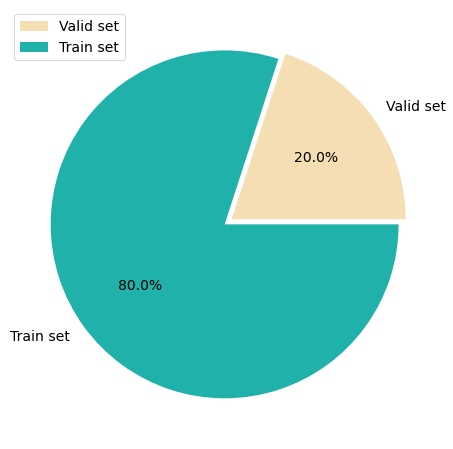

In [ ]:
#@title
plt.figure(figsize = (15, 8))
plt.rcParams['font.size'] = 14
plt.pie([valid_count.nb.sum(), train_count.nb.sum()],labels=["Valid set", "Train set"],autopct = lambda x: str(round(x, 2)) + '%',colors = ["wheat","lightseagreen"],shadow=False,explode=(0.05,0))
plt.legend();

print(f"Number of images in the Train Dataset: {train_count.nb.sum()}")
print(f"Number of images in the Validation Dataset: {valid_count.nb.sum()}")

### Train set

In [ ]:
#@title
# Check image Size of the first 10 images of each folders
from PIL import Image
import imghdr

img_size = set()
img_extension = set()

for f in train_dir:
  for img in os.listdir(train_path+'/'+f)[:10]:
    img_extension.add(imghdr.what(train_path+'/'+f+'/'+img))
    with Image.open(train_path+'/'+f+'/'+img) as image:
      img_size.add(image.size)

print(f"Image size (check 10 images per category): {img_size}")
print(f"Image extension (check 10 images per category): {img_extension}")

Image size (check 10 images per category): {(256, 256)}
Image extension (check 10 images per category): {'jpeg'}


**Summary :**
* Images type : JPEG
* Images dimensions : 256 x 256
* Images color: RGB
* Images number : 70295
* Images size : min= 2.7 kb , max = 30.7 kb, mean = 16.2 kb, Total = 1.14 Gb


### Validation set

**Summary :**
* Images type : JPEG
* Images dimensions : 256 x 256
* Images colro: RGB
* Images number : 17 572
* Images size : min= 3.9 kb , max = 28.2 kb, mean = 16.2 kb, Total = 285 Mb

## Class distribution

### Train set

**Number of images per Plants**

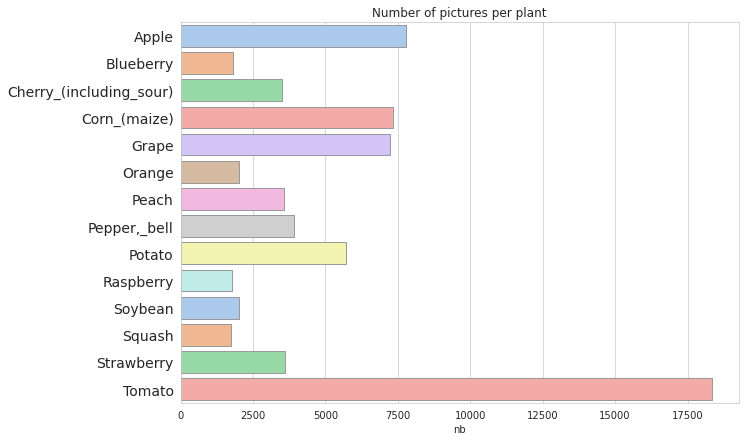

In [ ]:
#@title
kind=list(train_count['Plant'].unique())
count=train_count.groupby(by=['Plant'])['nb'].sum()
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,7))
ax.set_yticklabels(kind, fontsize=14)
ax=sns.barplot(x=count,y=kind,
            palette="pastel", edgecolor=".6",data=train_count).set_title("Number of pictures per plant")

**Healthy VS disease plant images distribution**

Number of healthy plants: 22294
Number of diseased plants: 48001

 Number of Healthy Category: 12
 Number of Diseased Category: 26


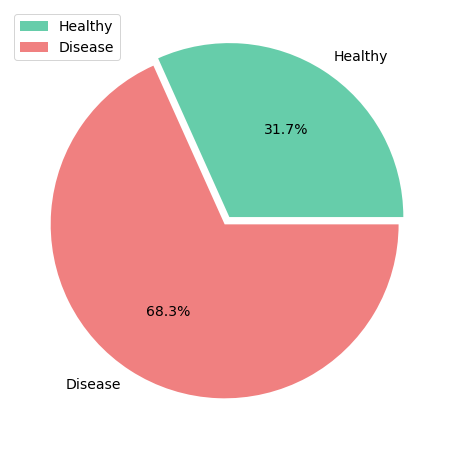

In [ ]:
#@title
plt.figure(figsize = (15, 8))
plt.rcParams['font.size'] = 14
plt.pie([train_count.nb[train_count.Category=='healthy'].sum(), train_count.nb[train_count.Category!='healthy'].sum()],labels=["Healthy", "Disease"],autopct = lambda x: str(round(x, 1)) + '%',colors = ["mediumaquamarine","lightcoral"],shadow=False,explode=(0.05,0))
plt.legend();

print(f"Number of healthy plants: {train_count.nb[train_count.Category=='healthy'].sum()}")
print(f"Number of diseased plants: {train_count.nb[train_count.Category!='healthy'].sum()}")
print(f"\n Number of Healthy Categories: {train_count.nb[train_count.Category =='healthy'].count()}")
print(f" Number of Diseased Categories: {train_count.nb[train_count.Category !='healthy'].count()}")


**Class distribution**

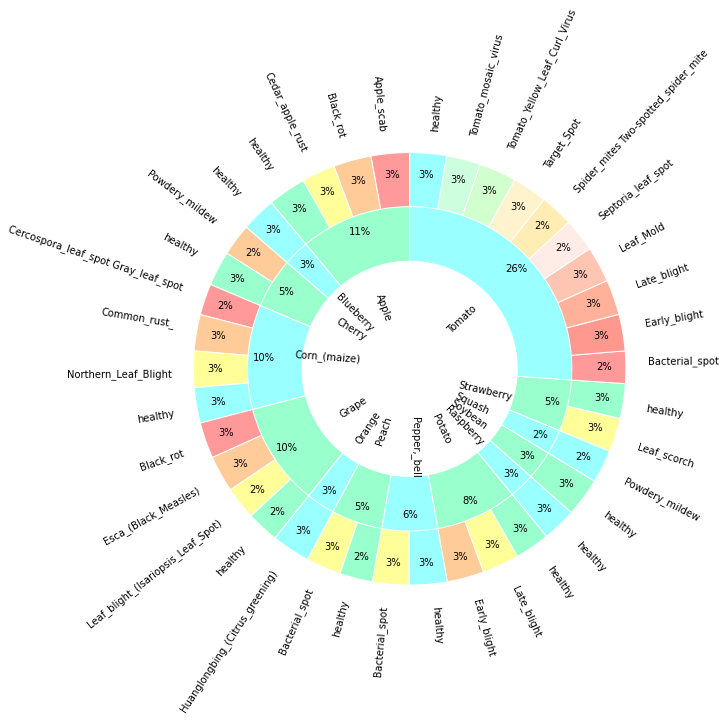

In [ ]:
#@title
import matplotlib.pyplot as plt
 
liste_plant_modif = ['Cherry' if x == 'Cherry_(including_sour)' else x for x in list(train_count.Plant.unique())]

# Data to plot
colors1 = ['#99ffcc', '#99ffff', '#99ffcc', '#99ffff','#99ffcc', '#99ffff','#99ffcc', '#99ffff','#99ffcc', '#99ffff','#99ffcc', '#99ffff','#99ffcc', '#99ffff',]
colors2 = ['#ff999a','#ffcb99', '#fffe99','#99ffcc',
           '#99ffff',
           '#ffcb99', '#99ffcc',
           '#ff999a','#ffcb99','#fffe99','#99ffff',
           '#ff999a','#ffcb99','#fffe99','#99ffcc',
           '#99ffff',
           '#fffe99','#99ffcc',
           '#fffe99','#99ffff',
           '#ffcb99','#fffe99','#99ffcc',
           '#99ffff',
           '#99ffcc',
           '#99ffff',
           '#fffe99','#99ffcc',
           '#ff999a','#ff9990','#ffb299','#ffc5b3','#ffece6','#ffedb3','#fff3cd','#d1ffcd','#cdffdf','#99ffff']
 
# Plot
plt.figure(figsize = (10, 10))

plt.pie(train_count.nb, labels=train_count.Category,  startangle=90,frame=True,radius=1,rotatelabels=True,colors=colors2,wedgeprops=dict(width=0.9, edgecolor='w'),autopct='%1.f%%',pctdistance=0.90)
plt.pie(train_info.groupby(['Plant']).size(),labels=liste_plant_modif,radius=0.75,startangle=90,labeldistance=0.3,rotatelabels=True,colors=colors1,wedgeprops=dict(width=0.9, edgecolor='w'),autopct='%1.f%%',pctdistance=0.90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
#@title
# Visualisation of Number of images per folders
from bokeh.transform import factor_cmap
from bokeh.palettes import plasma

# Get Tuple list of (Plants, Status)
x = list(train_count[['Plant', 'Category']].itertuples(index=False, name=None))
x= [('Cherry', a[1]) if a[0] == 'Cherry_(including_sour)' else (a[0], a[1]) for a in x]
# Get same color
colors =plasma(14)

index_cmap = factor_cmap('x', palette=colors, factors=sorted(train_count['Plant'].replace({'Cherry_(including_sour)':'Cherry'}).unique()), end=1)

# Source instanciation
source = ColumnDataSource({
        'x': x,
        'top': train_count['nb'],
})
# Create factor
factor = FactorRange(factors = x)

# Hover tool
tool_tuple = [('Plant: ', '@x'), ('# Images: ', '@top')]

# Create Figure - Bar chart
p = figure(plot_width=1400, plot_height=600, x_range=factor)
bar = p.vbar(width=0.9, x='x', top='top', source=source,
             fill_color=index_cmap, line_color="white")
# Orientation of the axis labels
p.xaxis.major_label_orientation = np.pi/2

# Create Hover tool and add it to the graph
hover = HoverTool(renderers = [bar], tooltips = tool_tuple)
p.add_tools(hover)

# Show Graph
show(p)

### Validation set

**Number of images per Plants**

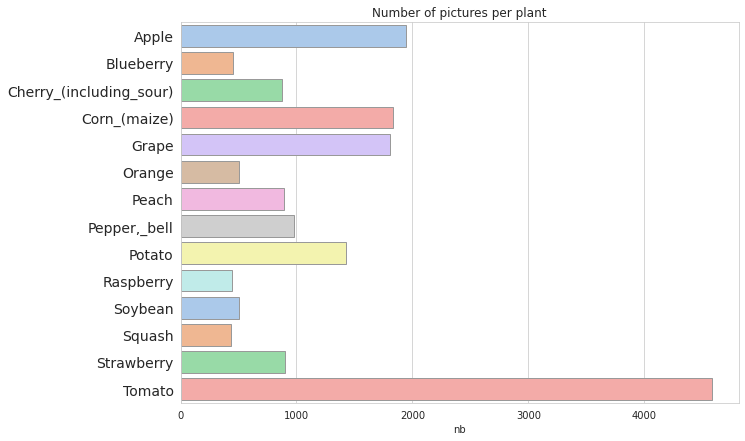

In [ ]:
#@title
kind=list(valid_count['Plant'].unique())
count=valid_count.groupby(by=['Plant'])['nb'].sum()
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,7))
ax.set_yticklabels(kind, fontsize=14)
ax=sns.barplot(x=count,y=kind,
            palette="pastel", edgecolor=".6",data=valid_count).set_title("Number of pictures per plant")

**Healthy VS disease plant images distribution**

Number of healthy plants: 5572
Number of diseased plants: 12000

 Number of Healthy Categories: 12
 Number of Diseased Categories: 26


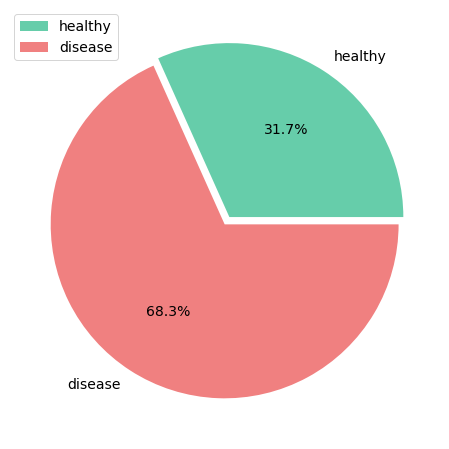

In [ ]:
#@title
plt.figure(figsize = (15, 8))
plt.rcParams['font.size'] = 14
plt.pie([valid_count.nb[valid_count.Category=='healthy'].sum(), valid_count.nb[valid_count.Category!='healthy'].sum()],labels=["healthy", "disease"],autopct = lambda x: str(round(x, 1)) + '%',colors = ["mediumaquamarine","lightcoral"],shadow=False,explode=(0.05,0))
plt.legend();

print(f"Number of healthy plants: {valid_count.nb[valid_count.Category=='healthy'].sum()}")
print(f"Number of diseased plants: {valid_count.nb[valid_count.Category!='healthy'].sum()}")

print(f"\n Number of Healthy Categories: {valid_count.nb[train_count.Category =='healthy'].count()}")
print(f" Number of Diseased Categories: {valid_count.nb[train_count.Category !='healthy'].count()}")

**Class distribution**

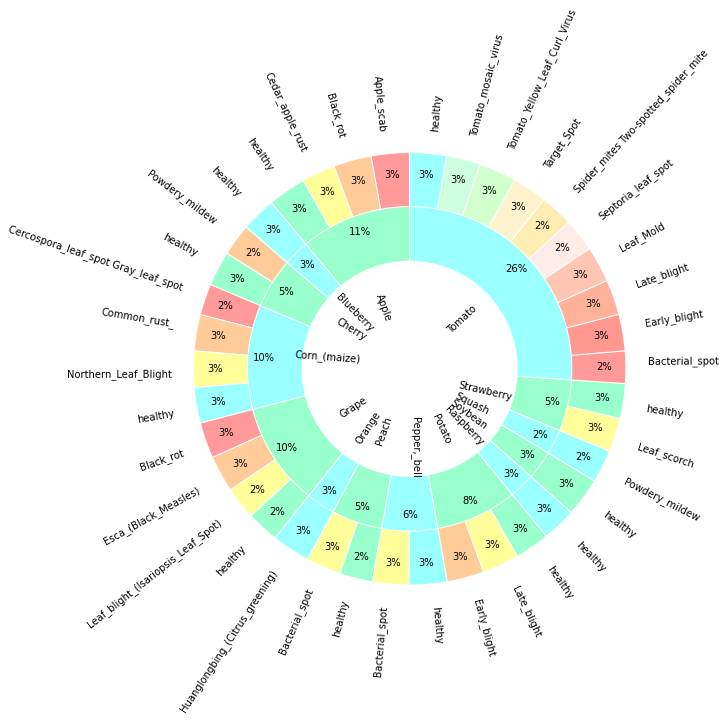

In [ ]:
#@title

liste_plant_modif = ['Cherry' if x == 'Cherry_(including_sour)' else x for x in list(valid_count.Plant.unique())]

# Data to plot
colors1 = ['#99ffcc', '#99ffff', '#99ffcc', '#99ffff','#99ffcc', '#99ffff','#99ffcc', '#99ffff','#99ffcc', '#99ffff','#99ffcc', '#99ffff','#99ffcc', '#99ffff',]
colors2 = ['#ff999a','#ffcb99', '#fffe99','#99ffcc',
           '#99ffff',
           '#ffcb99', '#99ffcc',
           '#ff999a','#ffcb99','#fffe99','#99ffff',
           '#ff999a','#ffcb99','#fffe99','#99ffcc',
           '#99ffff',
           '#fffe99','#99ffcc',
           '#fffe99','#99ffff',
           '#ffcb99','#fffe99','#99ffcc',
           '#99ffff',
           '#99ffcc',
           '#99ffff',
           '#fffe99','#99ffcc',
           '#ff999a','#ff9990','#ffb299','#ffc5b3','#ffece6','#ffedb3','#fff3cd','#d1ffcd','#cdffdf','#99ffff']
 
# Plot
plt.figure(figsize = (10, 10))

plt.pie(valid_count.nb, labels=valid_count.Category,  startangle=90,frame=True,radius=1,rotatelabels=True,colors=colors2,wedgeprops=dict(width=0.9, edgecolor='w'),autopct='%1.f%%',pctdistance=0.90)
plt.pie(valid_info.groupby(['Plant']).size(),labels=liste_plant_modif,radius=0.75,startangle=90,labeldistance=0.3,rotatelabels=True,colors=colors1,wedgeprops=dict(width=0.9, edgecolor='w'),autopct='%1.f%%',pctdistance=0.90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
#@title
# Visualisation of Number of images per folders
from bokeh.transform import factor_cmap
from bokeh.palettes import plasma

# Get Tuple list of (Plants, Status)
x = list(valid_count[['Plant', 'Category']].itertuples(index=False, name=None))
x= [('Cherry', a[1]) if a[0] == 'Cherry_(including_sour)' else (a[0], a[1]) for a in x]
# Get same color
colors =plasma(14)

index_cmap = factor_cmap('x', palette=colors, factors=sorted(valid_count['Plant'].replace({'Cherry_(including_sour)':'Cherry'}).unique()), end=1)

# Source instanciation
source = ColumnDataSource({
        'x': x,
        'top': valid_count['nb'],
})
# Create factor
factor = FactorRange(factors = x)

# Hover tool
tool_tuple = [('Plant: ', '@x'), ('# Images: ', '@top')]

# Create Figure - Bar chart
p = figure(plot_width=1400, plot_height=600, x_range=factor)
bar = p.vbar(width=0.9, x='x', top='top', source=source,
             fill_color=index_cmap, line_color="white")
# Orientation of the axis labels
p.xaxis.major_label_orientation = np.pi/2

# Create Hover tool and add it to the graph
hover = HoverTool(renderers = [bar], tooltips = tool_tuple)
p.add_tools(hover)

# Show Graph
show(p)

## Visualisation of sample leaves

1.   Élément de liste
2.   Élément de liste



Viisualisation of one leave for each plant and for each plant category.

We can notice that:
- Photos are taken in a closed environment.
- There is one leaf per image.
- Leaves seems to be centered in the image.
- Leaves' photos are not taken on the trees.
- Background seems to be always in a "grey" color.


In [ ]:
#@title
#Plot 1 image for each plant categorie and for each plant diseases
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

list_plant=list(valid_count.Plant.unique())
for plant in list_plant:  
  list_disease=train_info.Category[train_info['Plant']==plant].unique().tolist()
  
  if len(list_disease)<5:
    rows=1
    cols = len(list_disease)
  else:
    cols = 4
    rows = len(list_disease)//4+1
  fig, ax = plt.subplots(nrows=rows, ncols=cols,figsize=(cols*5,rows*5 ),squeeze=False)
  #, figsize=(rows*5,cols*5 )
  fig.suptitle(plant, fontsize=20)
  row=0
  col=0

  for diseases in list_disease:
    if col <4:
      col+=1
      row=row
    else:
      col=1
      row+=1 
    
    img = plt.imread(train_info[(train_info.Plant==plant) & (train_info.Category==diseases)].iloc[0,3])
    ax[row, col-1].axis('off')
    ax[row, col-1].set_title(diseases)
    ax[row, col-1].imshow(img)






## Summary

To sum up what we have seen above - for both Train and Validation set:
* Images type : JPEG
* Images dimensions : 256 x 256
* Image color: RGB

We have **14** types of plants, under **38** categories:
* **26** categories of diseased plants
* **12** categories of healthy plants

Train set represents 80% and Validation set represents 20% of the whole Dataset.

We do have 30 images of plants in a Test set, that we will use for the Presentation and Demo at the end of the project.

The dataset seems to have enough images in each category for us to proceed with the next step.

We are dealing with images (unstructured data), so it's probably best we use Deeplearning models.


